In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.utils import shuffle

## Load and Visualize the Data

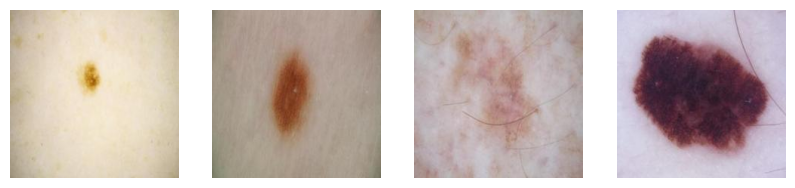

In [24]:
path_to_benign_images_train = 'data/train/Benign'
path_to_malignant_images_train = 'data/train/Malignant'
path_to_benign_images_test = 'data/test/Benign'
path_to_malignant_images_test = 'data/test/Malignant'

def load_and_display_images(image_paths):
    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(image_paths), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

benign_images_train = [os.path.join(path_to_benign_images_train, img) for img in os.listdir(path_to_benign_images_train)]
malignant_images_train = [os.path.join(path_to_malignant_images_train, img) for img in os.listdir(path_to_malignant_images_train)]
benign_images_test = [os.path.join(path_to_benign_images_test, img) for img in os.listdir(path_to_benign_images_test)]
malignant_images_test = [os.path.join(path_to_malignant_images_test, img) for img in os.listdir(path_to_malignant_images_test)]
random.shuffle(benign_images_train)
random.shuffle(malignant_images_train)
load_and_display_images(benign_images_train[:2] + malignant_images_train[:2])

In [25]:
print(f'Train data sizes: {len(benign_images_train)} benign images, {len(malignant_images_train)} malignant images')
print(f'Test data sizes: {len(benign_images_test)} benign images, {len(malignant_images_test)} malignant images')

Train data sizes: 6289 benign images, 5590 malignant images
Test data sizes: 1000 benign images, 1000 malignant images


## Enhance image quality

### Verify image size dimensions

In [26]:
def verify_image_sizes(path_to_images, target_width=224, target_height=224):
    correct_size = True
    for root, dirs, files in os.walk(path_to_images):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                image_path = os.path.join(root, file)
                img = cv2.imread(image_path)
                h, w, _ = img.shape
                if w != target_width or h != target_height:
                    print(f"Image {file} has dimensions {w}x{h}, not {target_width}x{target_height}.")
                    correct_size = False
    if correct_size:
        print(f"All images in {path_to_images} are {target_width}x{target_height}.")

image_paths = ['data/train/Benign', 'data/train/Malignant', 'data/test/Benign', 'data/test/Malignant']
for path_to_images in image_paths:
    verify_image_sizes(path_to_images)

All images in data/train/Benign are 224x224.
All images in data/train/Malignant are 224x224.
All images in data/test/Benign are 224x224.
All images in data/test/Malignant are 224x224.


## Preprocess the Images

## Train the model

In [31]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
def load_images_and_labels(image_paths, label):
    images = []
    labels = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

X_train_benign, y_train_benign = load_images_and_labels(benign_images_train, 0)
X_train_malignant, y_train_malignant = load_images_and_labels(malignant_images_train, 1)

X_test_benign, y_test_benign = load_images_and_labels(benign_images_test, 0)
X_test_malignant, y_test_malignant = load_images_and_labels(malignant_images_test, 1)

# Combine datasets
X_train = np.concatenate((X_train_benign, X_train_malignant), axis=0)
y_train = np.concatenate((y_train_benign, y_train_malignant), axis=0)
X_test = np.concatenate((X_test_benign, X_test_malignant), axis=0)
y_test = np.concatenate((y_test_benign, y_test_malignant), axis=0)

# Shuffle datasets
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [34]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
297/297 [==============================] - 119s 398ms/step - loss: 5.7672 - accuracy: 0.6966 - val_loss: 0.5416 - val_accuracy: 0.7222
Epoch 2/10
297/297 [==============================] - 117s 394ms/step - loss: 0.6437 - accuracy: 0.7070 - val_loss: 0.5779 - val_accuracy: 0.7576
Epoch 3/10
297/297 [==============================] - 115s 389ms/step - loss: 0.8932 - accuracy: 0.6833 - val_loss: 0.5835 - val_accuracy: 0.7247
Epoch 4/10
297/297 [==============================] - 118s 399ms/step - loss: 0.9374 - accuracy: 0.6729 - val_loss: 0.5965 - val_accuracy: 0.6570
Epoch 5/10
297/297 [==============================] - 118s 399ms/step - loss: 0.5870 - accuracy: 0.6829 - val_loss: 0.5938 - val_accuracy: 0.6646
Epoch 6/10
297/297 [==============================] - 118s 398ms/step - loss: 0.5796 - accuracy: 0.6888 - val_loss: 0.5931 - val_accuracy: 0.6742
Epoch 7/10
297/297 [==============================] - 119s 402ms/step - loss: 0.6545 - accuracy: 0.6753 - val_loss: 0.5945 -

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

63/63 [==============================] - 7s 109ms/step - loss: 0.6714 - accuracy: 0.5595
Test loss: 0.6713934540748596
Test accuracy: 0.559499979019165


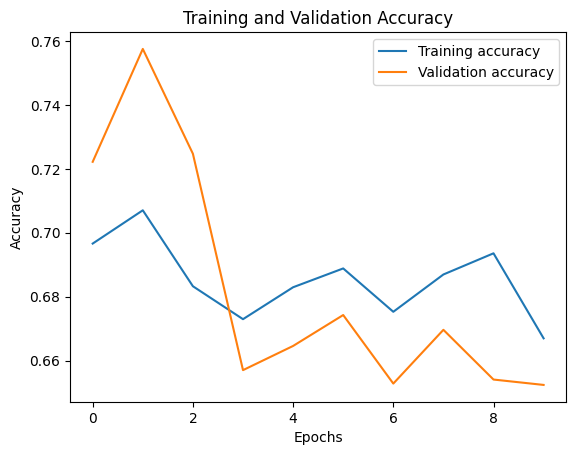

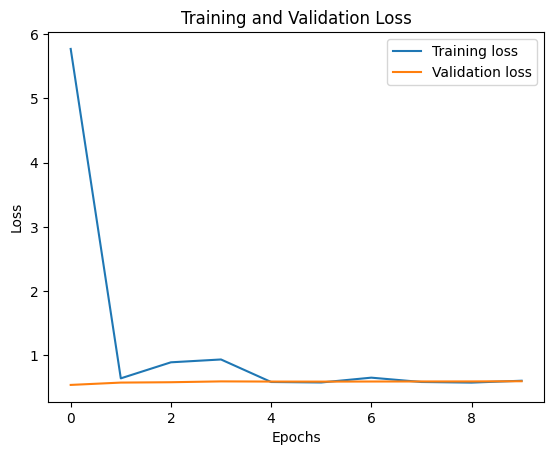

In [37]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()